# CHURN - Classification Analysis

## Overview

- [Description](#Description)  
- [Data Description](#Data-Description)
- [Data Preparation](#Data-Preparation)
- [Classification](#Classification)
    - [DECISION TREE](#DECISION-TREE)
    - [RANDOM FOREST](#RANDOM-FOREST)
    - [NAIVE BAYES](#NAIVE-BAYES)
    - [K-NEAREST NEIGHBORS](#K-NEAREST-NEIGHBORS)
    - [LOGISTIC REGRESSION](#LOGISTIC-REGRESSION)
    - [SUPPORT VECTOR MACHINE](#SUPPORT-VECTOR-MACHINE)

## Description

Our objective is to make **churn prediction**.

## Data Description

Columns:
- **RowNumber** (int > 0). Is not necessary as a feature
- **CustomerId** (int > 0). Is not necessary as a feature
- **Surname** (string). Is not necessary as a feature
- **CreditScore** (int). Numerical feature
- **Geography** (string). Categorical feature
- **Gender** (string). Categorical feature
- **Age** (int > 0). Numerical feature
- **Tenure** (int > 0). Numerical feature
- **Balance** (float). Numerical feature
- **NumOfProduct** (int > 0). Numerical feature
- **HasCrCard** (0/1). Binary feature
- **IsActiveMember** (0/1). Binary feature
- **EstimatedSalary** (float). Numerical feature
- **Exited** Target
    - exited (1): the customer left the company
    - no exited (0): the user remained at the company

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/Churn_Modelling.csv')

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Data Preparation

- Checking Missing Data (see [Missing Data](../../00 Data Preparation/01_Missing Data.ipynb))
- Feature scaling (see [Feature Scaling](../../00 Data Preparation/03_Feature_Scaling.ipynb))  (necessary for some classification algorithms)
- One-hot-encoding for categorical data (see [Categorical Data](../../00 Data Preparation/02_Categorical Data.ipynb))

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are **no null values** in our dataset

In [6]:
# values for categorical data
features_not_considered = ['RowNumber', 'CustomerId', 'Surname']
for column in df.columns:
    if (df[column].dtype) == 'object' and column not in features_not_considered:
        print(column)
        print('----------------')
        print(df[column].value_counts())
        print('\n')

Geography
----------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Gender
----------------
Male      5457
Female    4543
Name: Gender, dtype: int64




In [7]:
# isolating the target
y = df[['Exited']]
X_original = df.drop(labels=['Exited'], axis=1)

In [8]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [9]:
print('Exited')
print('----------------')
y['Exited'].value_counts()

Exited
----------------


0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
total = y.count()[0]
exited = y[y['Exited']==1].count()[0]
print("Churn Percentage: {0:.2f}%".format(exited/total * 100))

Churn Percentage: 20.37%


The dataset is **unbalanced**, the positive class (exited) account for 20.37% of all observations.

As we can see we have an **unbalanced** target so it will useful to use an **stratified sampling** when dealing with **train and test splitting** and **cross validation**.

In [11]:
X_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
# dropping columns that no are necessary: RowNumber, CustomerId, Surname
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
X_original.drop(labels=columns_to_drop, axis=1, inplace=True)
X_original.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
# processing categorical data
categorical_features = ['Geography', 'Gender']
X_one_hot_encoding = pd.get_dummies(X_original, columns=categorical_features)
X_one_hot_encoding.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


Depending on the classification algorithm to apply we will have to deal with the **Dummy Trap Variable** for our categorical variables.

In [14]:
# solving dummy variables
dummy_variables = ['Geography_Spain', 'Gender_Male']
X_dummy_trap_variable = X_one_hot_encoding.drop(labels=dummy_variables, axis=1)
X_dummy_trap_variable.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Gender_Female
0,619,42,2,0.00,1,1,1,101348.88,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


## Classification

In [15]:
# creating a dictionary for recording the results from the different models
results = {}
results['name'] = []
results['accuracy'] = []
results['model'] = []

In [16]:
# utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:.3f} (std: {1:.3f})'.format(results['mean_test_score'][candidate], results['std_test_score'][candidate]))
            print('Parameters: {0}'.format(results['params'][candidate]))
            print('')

In [38]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 11

# utility function to print/plot confusion matrix
def cnf_matrix_plot(cnf, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cnf, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    thresh = cnf.max() / 2.
    for i, j in itertools.product(range(cnf.shape[0]), range(cnf.shape[1])):
        plt.text(j, i, cnf[i, j],
                 horizontalalignment="center",
                 color="white" if cnf[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()   
    show_data_cnf(cnf)
    
def show_data_cnf(cnf):
    tp = cnf[1, 1] # true positive
    tn = cnf[0, 0] # true negative
    fp = cnf[0, 1] # false positive
    fn = cnf[1, 0] # false negative
    total = tp + tn + fp + fn
    print('Accuracy (tp + tn)/total: {0:.3f}'.format((tp + tn)/total))
    print('Precision (PPV) (tp/(tp + fp)): {0:.3f}'.format(tp/(tp+fp)))
    print('Recall (TPR) (tp/(tp + fp)): {0:.3f}'.format(tp/(tp+fn)))
    print('Fallout (FPR) (fp/(fp + tn)): {0:.3f}'.format(fp/(fp+tn)))

### DECISION TREE

See [Decision Tree](../../02 Classification/05 Decision Tree.ipynb) for a reference

Important Notes:
- Do not need **feature scaling**
- Do not need to worry about **dummy trap variable** althought **one-hot-encoding** is needed for categorical features.

In [39]:
# splittin training and test set
from sklearn.model_selection import train_test_split
X = X_one_hot_encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
tree = DecisionTreeClassifier(criterion='gini')

# we are not prunning the tree (beware of overfitting!)
tree.fit(X_train, y_train.values.ravel())
print('Accuracy: {0}'.format(tree.score(X_test, y_test)))

Accuracy: 0.7835


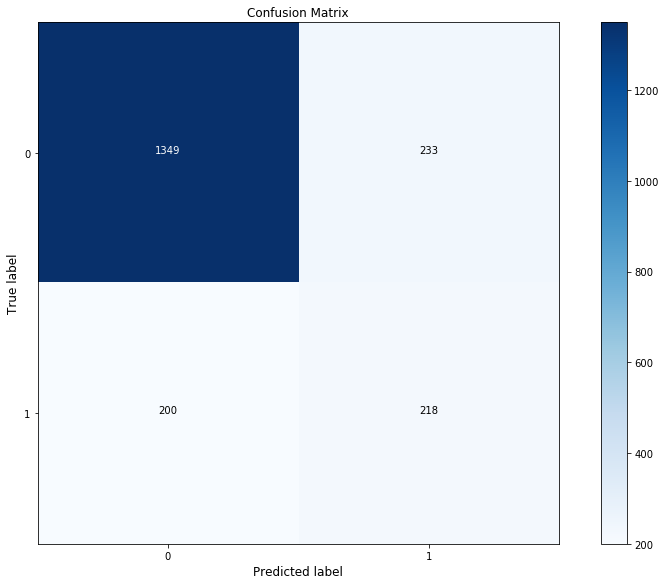

Accuracy (tp + tn)/total: 0.783
Precision (PPV) (tp/(tp + fp)): 0.483
Recall (TPR) (tp/(tp + fp)): 0.522
Fallout (FPR) (fp/(fp + tn)): 0.147


In [41]:
y_pred = tree.predict(X_test)
cnf = confusion_matrix(y_test, y_pred)
classes = tree.classes_
cnf_matrix_plot(cnf, classes=classes)

In [42]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=X.columns)

In [43]:
!dot -Tpng tree.dot -o tree.png

In [44]:
!cp tree.png ./images/

In [45]:
# pick a random integer with 1 in 2 billion chance of getting the same
# integer twice
import random
__counter__ = random.randint(0,2e9)

# now use IPython's rich display to display the html image with the
# new argument
from IPython.display import HTML, display
display(HTML('<img src="./images/tree.png?%d">'% __counter__))

As can be noticed by the previous image, the model is **too complex** (overfitting)  

Let's try to prune the tree using the parameters:
- max_depth
- min_samples_split
- min_samples_leaf

Let's see a **tree of maximum depth of 3**.

In [46]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
tree.fit(X_train, y_train.values.ravel())
print('Accuracy: {0}'.format(tree.score(X_test, y_test)))

Accuracy: 0.8355


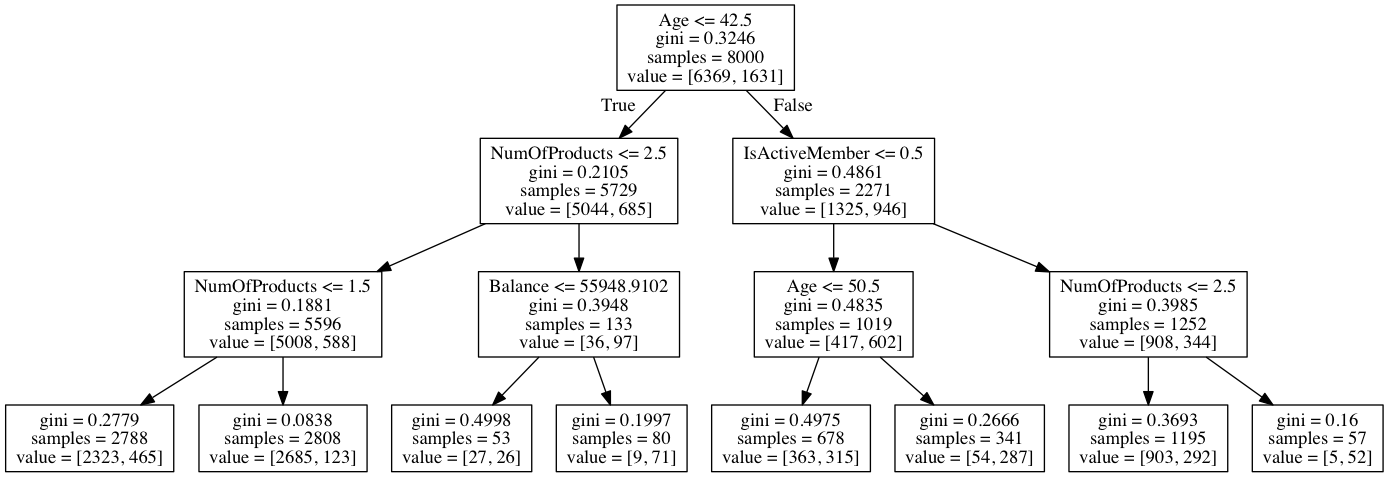

In [39]:
from IPython.display import Image
import pydotplus
# import sklearn.tree import export_graphviz (already imported)

dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

We are going to use **GridSearchCV** for tunnig the main parameters.

In [25]:
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

tree = DecisionTreeClassifier(criterion='gini')
cv = StratifiedKFold(n_splits=10)
parameters = {'max_depth':[2, 3, 4, 5],
              'min_samples_split': [50, 100, 200],
              'min_samples_leaf': [50, 100, 200]
              }
grid_search = GridSearchCV(estimator=tree, param_grid=parameters, cv=cv, n_jobs=-1, verbose=1)

In [26]:
start = time()
grid_search.fit(X_train, y_train.values.ravel())
end = time()

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.6s finished


In [27]:
print("GridSearchCV took: {0:.3f} for {1} candidate parameter settings".format(end-start, len(grid_search.cv_results_['params'])))

GridSearchCV took: 3.957 for 36 candidate parameter settings


In [28]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.845 (std: 0.008)
Parameters: {'min_samples_split': 200, 'max_depth': 4, 'min_samples_leaf': 50}

Model with rank: 2
Mean validation score: 0.845 (std: 0.009)
Parameters: {'min_samples_split': 200, 'max_depth': 5, 'min_samples_leaf': 50}

Model with rank: 3
Mean validation score: 0.844 (std: 0.008)
Parameters: {'min_samples_split': 50, 'max_depth': 4, 'min_samples_leaf': 50}

Model with rank: 3
Mean validation score: 0.844 (std: 0.008)
Parameters: {'min_samples_split': 100, 'max_depth': 4, 'min_samples_leaf': 50}



In [29]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [30]:
grid_search.best_params_           

{'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 200}

In [31]:
grid_search.best_score_

0.84512500000000002

In [32]:
grid_search.cv_results_

{'mean_fit_time': array([ 0.04070501,  0.0270375 ,  0.03048306,  0.02239079,  0.02302339,
         0.0210628 ,  0.02051554,  0.02467051,  0.02437882,  0.03135939,
         0.02941909,  0.03010828,  0.0301151 ,  0.04531345,  0.03081264,
         0.02714014,  0.02603221,  0.0319402 ,  0.03990502,  0.03789582,
         0.03163066,  0.03215854,  0.03168461,  0.03080542,  0.03517559,
         0.02976031,  0.02905288,  0.0443572 ,  0.04627512,  0.04008031,
         0.0370389 ,  0.03429163,  0.03508677,  0.0318933 ,  0.02796981,
         0.02791243]),
 'mean_score_time': array([ 0.0033174 ,  0.00151577,  0.00120287,  0.00106635,  0.00098159,
         0.00091007,  0.00096078,  0.0010036 ,  0.00096695,  0.00096819,
         0.00149419,  0.00138502,  0.00159116,  0.00136595,  0.00176353,
         0.00095589,  0.00130537,  0.00103726,  0.00108571,  0.00091755,
         0.00102971,  0.00094059,  0.00099387,  0.00094357,  0.00098937,
         0.0010637 ,  0.00100234,  0.00332727,  0.00101378,  0.00

In [33]:
grid_search.score(X_test, y_test)

0.85750000000000004

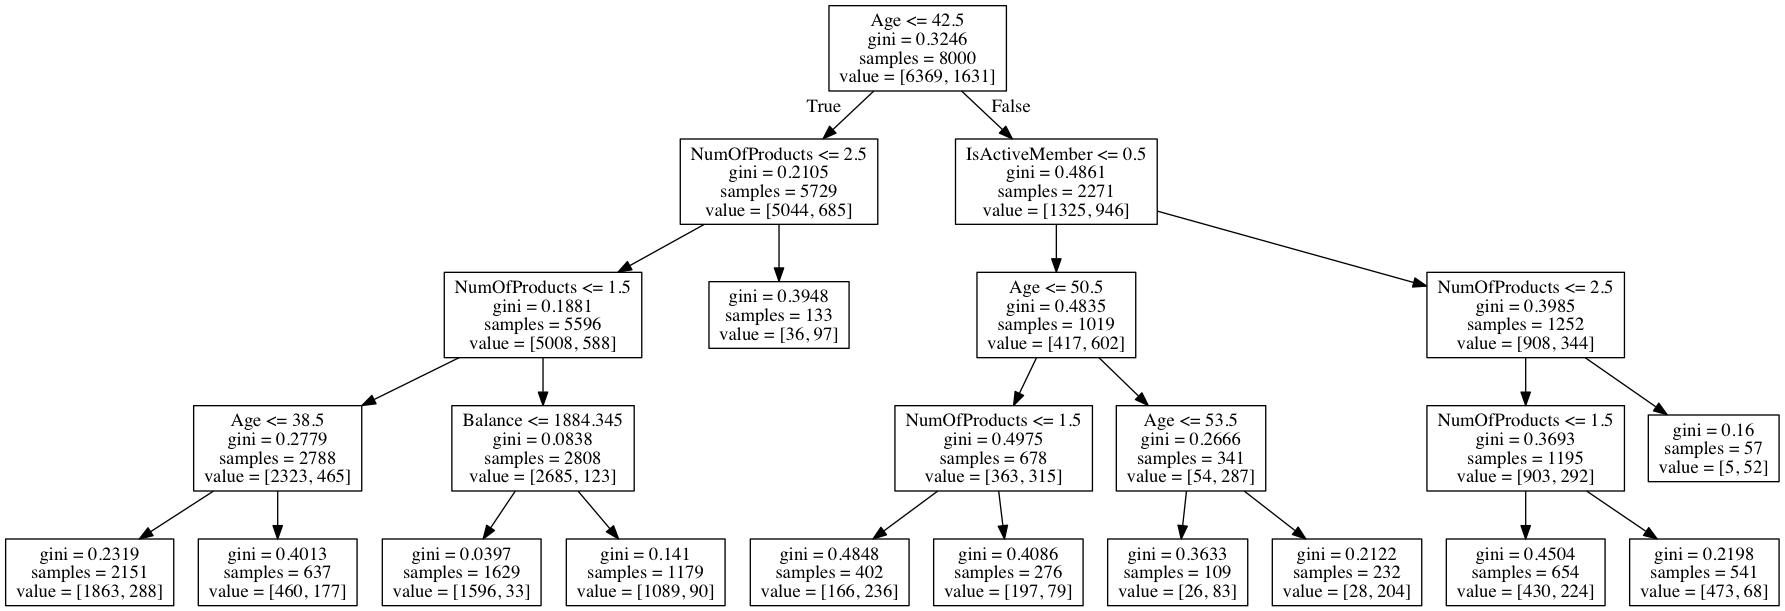

In [34]:
from IPython.display import Image
import pydotplus
# import sklearn.tree import export_graphviz (already imported)

dot_data = export_graphviz(grid_search.best_estimator_, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [35]:
# picking up the best model
results['name'].append('Decision Tree')
results['accuracy'].append(grid_search.score(X_test, y_test))
results['model'].append(grid_search.best_estimator_)
print(results)

{'name': ['Decision Tree'], 'accuracy': [0.85750000000000004], 'model': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')]}


## RANDOM FOREST

See [Random Forest](../../02 Classification/06 Random Forest.ipynb) for a reference

Important Notes:
- Do not need **feature scaling**
- Do not need to worry about **dummy trap variable** althought **one-hot-encoding** is needed for categorical features.

In [41]:
# splittin training and test set
from sklearn.model_selection import train_test_split
X = X_one_hot_encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='gini')

forest.fit(X_train, y_train.values.ravel())
print('Accuracy: {0}'.format(forest.score(X_test, y_test)))

Accuracy: 0.8425


In [43]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(criterion='gini')
cv = 10
parameters = {'n_estimators':[10, 50, 100],
              'min_samples_split': [50, 100, 200],
              'min_samples_leaf': [50, 100, 200],}
grid_search = GridSearchCV(estimator=forest, param_grid=parameters, cv=cv, n_jobs=-1, verbose=1)

In [44]:
start = time()
grid_search.fit(X_train, y_train.values.ravel())
end = time()

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.1s
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:   44.5s finished


In [45]:
print("GridSearchCV took: {0:.3f} for {1} candidate parameter settings".format(end-start, len(grid_search.cv_results_['params'])))

GridSearchCV took: 45.111 for 27 candidate parameter settings


In [46]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.850 (std: 0.011)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 50, 'n_estimators': 50}

Model with rank: 2
Mean validation score: 0.848 (std: 0.009)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 50, 'n_estimators': 10}

Model with rank: 3
Mean validation score: 0.846 (std: 0.012)
Parameters: {'min_samples_split': 200, 'min_samples_leaf': 50, 'n_estimators': 10}



In [47]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [48]:
grid_search.best_params_           

{'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 50}

In [49]:
grid_search.best_score_

0.84950000000000003

In [50]:
grid_search.cv_results_

{'mean_fit_time': array([ 0.13406477,  0.55902107,  1.15569971,  0.1200938 ,  0.5747154 ,
         1.27674968,  0.12693653,  0.57707899,  1.07913771,  0.11656172,
         0.49247088,  0.99298589,  0.11517251,  0.5073925 ,  1.02163174,
         0.11417933,  0.49722297,  1.00000713,  0.09639509,  0.4558167 ,
         0.90910194,  0.10690911,  0.4453706 ,  0.87389331,  0.09990456,
         0.44256239,  0.86714149]),
 'mean_score_time': array([ 0.00613852,  0.02090776,  0.04334259,  0.00459762,  0.02044177,
         0.04018583,  0.00590873,  0.01977515,  0.03723736,  0.00565031,
         0.02385528,  0.03665912,  0.0052593 ,  0.02010264,  0.04481003,
         0.0046885 ,  0.0212337 ,  0.03696244,  0.00443151,  0.01996305,
         0.04176297,  0.00508382,  0.01943531,  0.03565755,  0.00532422,
         0.0177366 ,  0.03246901]),
 'mean_test_score': array([ 0.8475  ,  0.8495  ,  0.844375,  0.84375 ,  0.845   ,  0.8445  ,
         0.84625 ,  0.841625,  0.843   ,  0.836625,  0.833625,  0.833

In [51]:
grid_search.score(X_test, y_test)

0.84799999999999998

In [52]:
# picking up the best model
results['name'].append('Random Forest')
results['accuracy'].append(grid_search.score(X_test, y_test))
results['model'].append(grid_search.best_estimator_)
print(results)

{'model': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)], 'accuracy': [0.85899999999999999, 0.84799999999999998], 'name': ['Decision Tree', 'Random Forest']}


## NAIVE BAYES

See [Naive Bayes](../../02 Classification/00 Naive Bayes.ipynb) for a reference

Important Notes:
- Do not need **feature scaling**
- Do not need to worry about **dummy trap variable** althought **one-hot-encoding** is needed for categorical features.

In [59]:
# splittin training and test set
from sklearn.model_selection import train_test_split
X = X_one_hot_encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train.values.ravel())
print('Accuracy: {0}'.format(gnb.score(X_test, y_test)))

Accuracy: 0.7905


Using **cross_val_score** in order to evaluate the model

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)
accuracies = cross_val_score(estimator=gnb, X=X_train, y=y_train.values.ravel(), cv=cv)
for idx, accuracy in enumerate(accuracies):
    print('Iteration: {0} Accuracy:{1:.3f}'.format(idx, accuracy))
print('Mean validation score: {0:.3f} (std: {1:.3f})'.format(accuracies.mean(), accuracies.std()))

Iteration: 0 Accuracy:0.788
Iteration: 1 Accuracy:0.780
Iteration: 2 Accuracy:0.784
Iteration: 3 Accuracy:0.784
Iteration: 4 Accuracy:0.795
Iteration: 5 Accuracy:0.782
Iteration: 6 Accuracy:0.777
Iteration: 7 Accuracy:0.775
Iteration: 8 Accuracy:0.787
Iteration: 9 Accuracy:0.783
Mean validation score: 0.784 (std: 0.005)


In [67]:
# picking up the model
results['name'].append('Naive Bayes')
results['accuracy'].append(gnb.score(X_test, y_test))
results['model'].append(gnb)
print(results)

{'model': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False), GaussianNB(priors=None), GaussianNB(priors=None), GaussianNB(priors=None)], 'accuracy': [0.85899999999999999, 0.84799999999999998, 0.76700000000000002, 0.79049999999999998, 0.79049999999999998], 'name': ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Naive Bayes', 'Naive Bayes']}


## K-NEAREST NEIGHBORS

See [K-Nearest Neighbors](../../02 Classification/01 K-Nearest Neighbor.ipynb) for a reference

Important Notes:
- Need **feature scaling**
- Since KNN is affected by the *curse of dimensionality* we will deal with **dummy trap variable** since in this case we avoid working with two more features.

In [79]:
# splittin training and test set
from sklearn.model_selection import train_test_split
X = X_dummy_trap_variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, 
                           weights='uniform', 
                           algorithm='auto', 
                           p=2, 
                           metric='minkowski')

from sklearn.preprocessing import StandardScaler
sd = StandardScaler(with_mean=True, with_std=True)

X_train_scaled = sd.fit_transform(X_train)
X_test_scaled = sd.transform(X_test)

knn.fit(X_train_scaled, y_train.values.ravel())
print('Accuracy: {0}'.format(knn.score(X_test_scaled, y_test)))

Accuracy: 0.83


In [81]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
parameters = {'n_neighbors':[5, 10, 15, 25, 50],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}
grid_search = GridSearchCV(estimator=knn, param_grid=parameters, cv=10, n_jobs=-1, verbose=1)

In [82]:
start = time()
grid_search.fit(X_train_scaled, y_train.values.ravel())
end = time()

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  3.4min finished


In [83]:
print("GridSearchCV took: {0:.3f} for {1} candidate parameter settings".format(end-start, len(grid_search.cv_results_['params'])))

GridSearchCV took: 202.955 for 20 candidate parameter settings


In [84]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.837 (std: 0.008)
Parameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Model with rank: 2
Mean validation score: 0.836 (std: 0.008)
Parameters: {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

Model with rank: 3
Mean validation score: 0.836 (std: 0.008)
Parameters: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}



In [85]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=1,
           weights='distance')

In [86]:
grid_search.best_params_

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [87]:
grid_search.best_score_

0.83650000000000002

In [77]:
grid_search.cv_results_

{'mean_fit_time': array([ 0.03071382,  0.02272966,  0.02056153,  0.02140021,  0.0208637 ,
         0.02049832,  0.02251987,  0.02169271,  0.02057137,  0.01997166,
         0.02104108,  0.02507071,  0.02158432,  0.0215184 ,  0.02003911,
         0.01965015,  0.02155311,  0.02705436,  0.0216666 ,  0.02022908]),
 'mean_score_time': array([ 0.27692149,  0.3137099 ,  0.20791359,  0.21432555,  0.34990921,
         0.35576286,  0.28823721,  0.29498539,  0.41117809,  0.39738312,
         0.32977574,  0.35105782,  0.46265862,  0.45903833,  0.43673422,
         0.40636835,  0.54634278,  0.58745916,  0.49887145,  0.49196742]),
 'mean_test_score': array([ 0.827125,  0.825125,  0.827125,  0.82675 ,  0.830375,  0.834125,
         0.829125,  0.8335  ,  0.8315  ,  0.83325 ,  0.833   ,  0.8345  ,
         0.827375,  0.830625,  0.82975 ,  0.832375,  0.82225 ,  0.825375,
         0.822625,  0.824625]),
 'mean_train_score': array([ 0.87366668,  1.        ,  0.87370832,  1.        ,  0.848625  ,
         1

In [78]:
grid_search.score(X_test_scaled, y_test)

0.82650000000000001

In [65]:
# picking up the best model
results['name'].append('K-Nearest Neighbor')
results['accuracy'].append(grid_search.score(X_test_scaled, y_test))
results['model'].append(grid_search.best_estimator_)
print(results)

{'accuracy': [0.85499999999999998, 0.85399999999999998, 0.78449999999999998, 0.84299999999999997], 'model': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False), GaussianNB(priors=None), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=1,
           weights='distance')], '

## LOGISTIC REGRESSION

See [Logistic Regression](../../02 Classification/03 Logistic Regression.ipynb) for a reference



In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', 
                        C=1.0, 
                        max_iter=100)

lr.fit(X_train_scaled, y_train.values.ravel())
print('Accuracy: {0}'.format(lr.score(X_test_scaled, y_test)))

Accuracy: 0.811


In [79]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(n_jobs=-1)
parameters = {'penalty': ['l1', 'l2'],
              'C':[0.0001, 0.001, 0.01, 0.1, 1.0],
              'max_iter': [100, 500, 1000, 5000]}
grid_search = GridSearchCV(estimator=lr, param_grid=parameters, cv=5, n_jobs=-1, verbose=1)

In [80]:
start = time()
grid_search.fit(X_train_scaled, y_train.values.ravel())
end = time()

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.4s finished


In [81]:
print("GridSearchCV took: {0:.3f} for {1} candidate parameter settings".format(end-start, len(grid_search.cv_results_['params'])))

GridSearchCV took: 2.634 for 40 candidate parameter settings


In [82]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.811 (std: 0.003)
Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.811 (std: 0.003)
Parameters: {'C': 0.01, 'max_iter': 500, 'penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.811 (std: 0.003)
Parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.811 (std: 0.003)
Parameters: {'C': 0.01, 'max_iter': 5000, 'penalty': 'l2'}



In [83]:
grid_search.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
grid_search.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}

In [85]:
grid_search.best_score_

0.81100000000000005

In [86]:
grid_search.cv_results_

{'mean_fit_time': array([ 0.02449355,  0.04040217,  0.01875882,  0.0360744 ,  0.03131461,
         0.02710223,  0.02113676,  0.03163681,  0.0308918 ,  0.05436735,
         0.01847949,  0.04643126,  0.02896719,  0.0294466 ,  0.02649341,
         0.04024696,  0.03673635,  0.03736582,  0.0247602 ,  0.02889805,
         0.02210979,  0.02661123,  0.02166781,  0.02459679,  0.027385  ,
         0.02946796,  0.02739797,  0.03072186,  0.03560762,  0.02398219,
         0.0275166 ,  0.0254015 ,  0.02902341,  0.02816858,  0.03278503,
         0.03124166,  0.03914623,  0.03393803,  0.03720565,  0.02217226]),
 'mean_score_time': array([ 0.01154914,  0.00528307,  0.0150176 ,  0.01120725,  0.01180558,
         0.00942297,  0.01009021,  0.01407657,  0.00884042,  0.01124239,
         0.0172523 ,  0.01333017,  0.00694346,  0.00900702,  0.00926204,
         0.00594296,  0.00330625,  0.00148363,  0.00469103,  0.00195837,
         0.00194621,  0.00105724,  0.00157056,  0.00159898,  0.00137963,
         0.00

In [87]:
grid_search.score(X_test_scaled, y_test)

0.8115

In [89]:
# picking up the best model
results['name'].append('Logisctic Regression')
results['accuracy'].append(grid_search.score(X_test_scaled, y_test))
results['model'].append(grid_search.best_estimator_)
print(results)

{'accuracy': [0.85499999999999998, 0.85399999999999998, 0.78449999999999998, 0.84299999999999997, 0.20300000000000001, 0.8115], 'model': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False), GaussianNB(priors=None), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=1,
     

## SUPPORT VECTOR MACHINE

See [Support Vector Machine](../../02 Classification/04 Support Vector Machine.ipynb) for a reference

In [93]:
from sklearn.svm import SVC
svc = SVC(C=1.0, 
          kernel='rbf',
          degree=3, 
          gamma='auto',
          coef0=0.0)

svc.fit(X_train_scaled, y_train.values.ravel())
print('Accuracy: {0}'.format(svc.score(X_test_scaled, y_test)))

Accuracy: 0.8635


In [95]:
from sklearn.model_selection import GridSearchCV

svc = SVC(cache_size=1000)
parameters = {'C':[0.01, 0.1, 1.0],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [3, 5],
              'gamma': ['auto', 0.1, 0.01],
              'coef0': [0.0, 0.1, 1.0],
              'class_weight':[None, 'balanced']}

grid_search = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, n_jobs=-1, verbose=1)

In [96]:
start = time()
grid_search.fit(X_train_scaled, y_train.values.ravel())
end = time()

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   42.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  8.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 22.6min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 33.1min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 42.1min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 56.9min
[Parallel(n_jobs=4)]: Done 2880 out of 2880 | elapsed: 70.4min finished


In [97]:
print("GridSearchCV took: {0:.3f} for {1} candidate parameter settings".format(end-start, len(grid_search.cv_results_['params'])))

GridSearchCV took: 4224.381 for 576 candidate parameter settings


In [98]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.858 (std: 0.004)
Parameters: {'C': 1.0, 'coef0': 1.0, 'gamma': 0.1, 'class_weight': None, 'kernel': 'poly', 'degree': 3}

Model with rank: 2
Mean validation score: 0.858 (std: 0.005)
Parameters: {'C': 1.0, 'coef0': 0.1, 'gamma': 'auto', 'class_weight': None, 'kernel': 'poly', 'degree': 3}

Model with rank: 3
Mean validation score: 0.858 (std: 0.004)
Parameters: {'C': 1.0, 'coef0': 1.0, 'gamma': 'auto', 'class_weight': None, 'kernel': 'poly', 'degree': 3}



In [99]:
grid_search.best_estimator_

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=1.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
grid_search.best_params_

{'C': 1.0,
 'class_weight': None,
 'coef0': 1.0,
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'poly'}

In [101]:
grid_search.best_score_

0.858375

In [102]:
grid_search.cv_results_

{'mean_fit_time': array([  1.69301219,   1.91129861,   2.22497039,   3.23065476,
          1.44273877,   2.62630467,   2.60723338,   2.89228439,
          1.27675786,   1.67115307,   2.24575076,   1.57805319,
          1.32019591,   2.5651186 ,   2.12841635,   2.27551746,
          1.30819836,   2.09917636,   2.10871458,   2.32128687,
          1.26678095,   1.99955645,   1.73209977,   1.43175855,
          1.22813983,   1.9892714 ,   1.95789123,   2.20398703,
          1.05560865,   1.76243782,   2.1393002 ,   2.11519122,
          0.99984779,   1.26657457,   1.82155838,   1.67553582,
          1.26330042,   1.89769235,   1.85256143,   1.98787355,
          1.18655076,   1.58880844,   1.75683475,   2.69576283,
          1.18156776,   1.60709219,   2.32916722,   1.67634115,
          1.31474943,   1.8897634 ,   1.71996231,   1.77852669,
          1.18501101,   1.54226141,   1.91150904,   2.06459517,
          1.02975678,   1.33794794,   1.78318095,   1.7336648 ,
          1.06823702,  

In [103]:
grid_search.score(X_test_scaled, y_test)

0.86650000000000005

In [104]:
# picking up the best model
results['name'].append('SVM')
results['accuracy'].append(grid_search.score(X_test_scaled, y_test))
results['model'].append(grid_search.best_estimator_)
print(results)

{'accuracy': [0.85499999999999998, 0.85399999999999998, 0.78449999999999998, 0.84299999999999997, 0.20300000000000001, 0.8115, 0.86650000000000005], 'model': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False), GaussianNB(priors=None), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_nei